# Introduction to pandas, visualizing Titanic

## Master 2 TSE

#### Raphaël Sourty

In [2]:
import pandas as pd

#### You can download the data here: https://www.kaggle.com/c/titanic/data

In [8]:
df = pd.read_csv('C:/Users/merie/Documents/titanic/train.csv')

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


| Variable 	| Definition                                 	| Key                                            	|
|----------	|--------------------------------------------	|------------------------------------------------	|
| survival 	| Survival                                   	| 0 = No, 1 = Yes                                	|
| pclass   	| Ticket class                               	| 1 = 1st, 2 = 2nd, 3 = 3rd                      	|
| sex      	| Sex                                        	|                                                	|
| Age      	| Age in years                               	|                                                	|
| sibsp    	| # of siblings / spouses aboard the Titanic 	|                                                	|
| parch    	| # of parents / children aboard the Titanic 	|                                                	|
| ticket   	| Ticket number                              	|                                                	|
| fare     	| Passenger fare                             	|                                                	|
| cabin    	| Cabin number                               	|                                                	|
| embarked 	| Port of Embarkation                        	| C = Cherbourg, Q = Queenstown, S = Southampton 	|

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Who are the survivors of the Titanic?

#### Survival rate

In [11]:
df.groupby('Survived')['PassengerId'].agg(['count'])

,count
Survived,
0,549
1,342


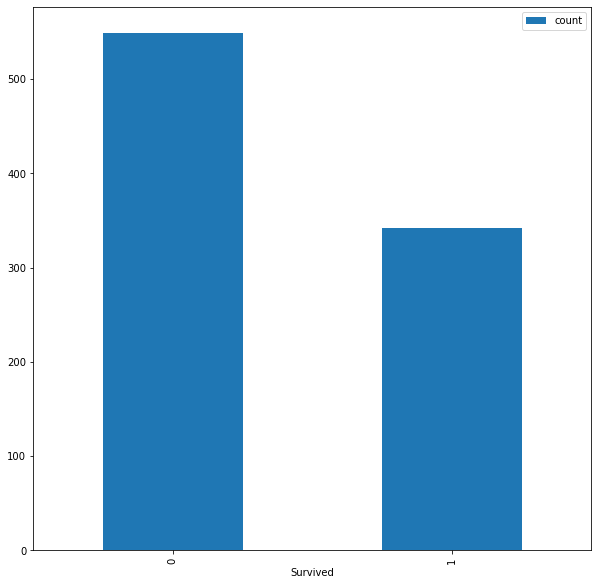

In [6]:
df.groupby('Survived')['PassengerId'].agg(
    ['count']
).reset_index().plot(x='Survived', y='count', kind = 'bar', figsize = (10, 10))

reset_index() : Après l'opération d'agrégation, reset_index() réinitialise l'index pour obtenir un dataframe ordinaire où les groupes (ici les valeurs de 'Survived', 0 ou 1) deviennent des colonnes au lieu d'être dans l'index.

#### Survival rate depending on genre

In [12]:
df.groupby(
    ['Survived', 'Sex']
)['PassengerId'].agg(['count'])

count
Survived Sex          
0        female     81
         male      468
1        female    233
         male      109

In [14]:
df.groupby(
    ['Survived', 'Sex']
)['PassengerId'].agg(['count']).unstack()

count     
Sex      female male
Survived            
0            81  468
1           233  109

unstack() : Après avoir compté les passagers dans chaque groupe, la méthode unstack() est utilisée pour réorganiser le résultat. En l'absence de cette méthode, le résultat serait un DataFrame groupé avec une hiérarchie d'index (MultiIndex), où les valeurs de 'Survived' et 'Sex' seraient dans l'index. unstack() déplace l'un des niveaux d'index vers les colonnes, rendant le tableau plus facile à lire. Par défaut, l'index le plus interne (ici, 'Sex') sera déplacé en colonnes, ce qui signifie que vous obtiendrez une colonne pour chaque sexe (hommes et femmes) avec le décompte des survivants et des non-survivants.

<Axes: xlabel='Survived'>

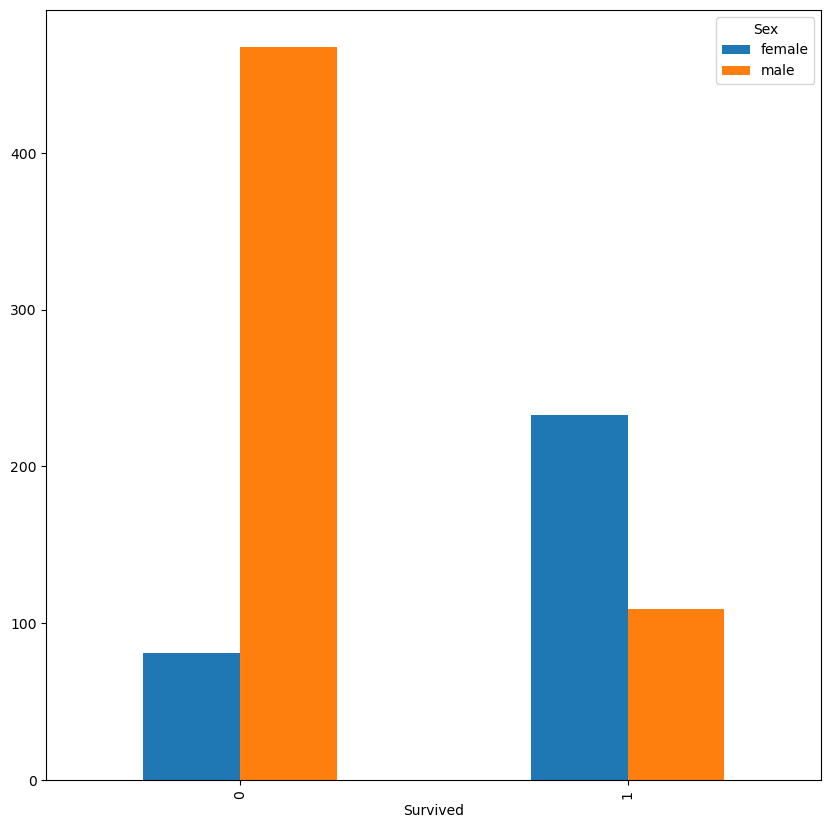

In [15]:
df.groupby(
    ['Survived', 'Sex']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### Survival rate depending on Ticket class

In [16]:
df.groupby(['Survived', 'Pclass'])['PassengerId'].agg(
    ['count']
)

count
Survived Pclass       
0        1          80
         2          97
         3         372
1        1         136
         2          87
         3         119

In [17]:
df.groupby(['Survived', 'Pclass'])['PassengerId'].count().unstack()

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<Axes: xlabel='Survived'>

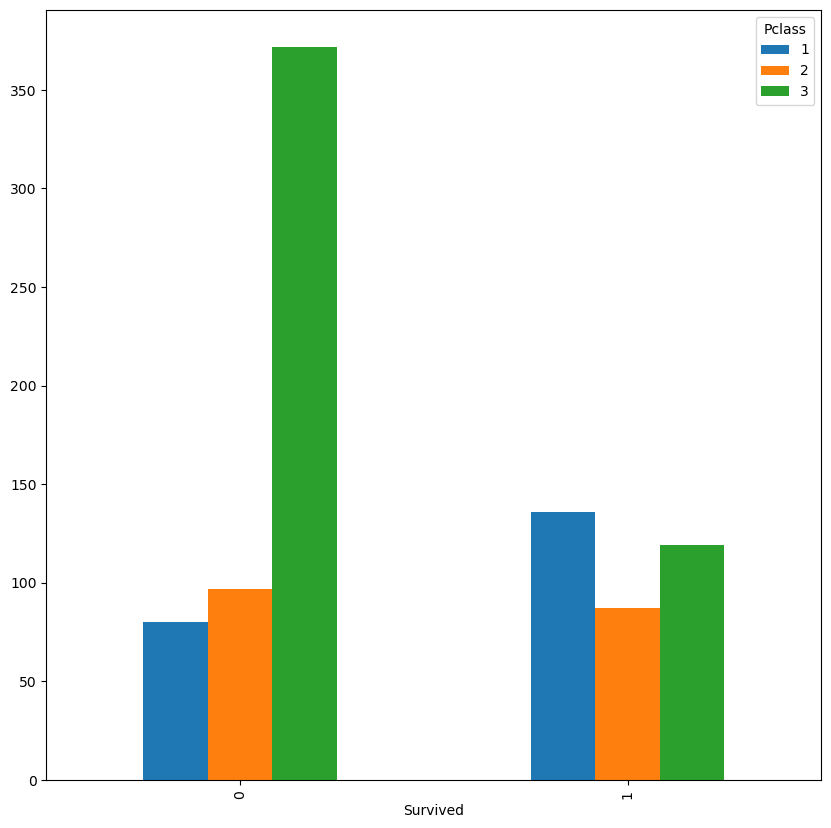

In [18]:
df.groupby(
    ['Survived', 'Pclass']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### Survival rate depending on Age

In [19]:
df['generation'] = pd.cut(df['Age'], 8)

In [21]:
# [(0.34, 10.368] 
# (10.368, 20.315] 
# (20.315, 30.263] 
# (30.263, 40.21] 
# (40.21, 50.158] 
# (50.158, 60.105] 
# (60.105, 70.052] 
# (70.052, 80.0]]

pd.cut(df['Age'], 8)

0      (20.315, 30.263]
1       (30.263, 40.21]
2      (20.315, 30.263]
3       (30.263, 40.21]
4       (30.263, 40.21]
             ...       
886    (20.315, 30.263]
887    (10.368, 20.315]
888                 NaN
889    (20.315, 30.263]
890     (30.263, 40.21]
Name: Age, Length: 891, dtype: category
Categories (8, interval[float64, right]): [(0.34, 10.368] < (10.368, 20.315] < (20.315, 30.263] < (30.263, 40.21] < (40.21, 50.158] < (50.158, 60.105] < (60.105, 70.052] < (70.052, 80.0]]

La fonction pd.cut() de la bibliothèque pandas est utilisée pour diviser (ou "découper") les données numériques en intervalles discrets. Dans votre exemple, vous appliquez pd.cut() sur la colonne 'Age' du DataFrame df, en spécifiant 8 comme argument, ce qui signifie que vous voulez diviser la colonne 'Age' en 8 intervalles égaux.

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,generation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.315, 30.263]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.263, 40.21]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20.315, 30.263]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.263, 40.21]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30.263, 40.21]"


<Axes: xlabel='Survived'>

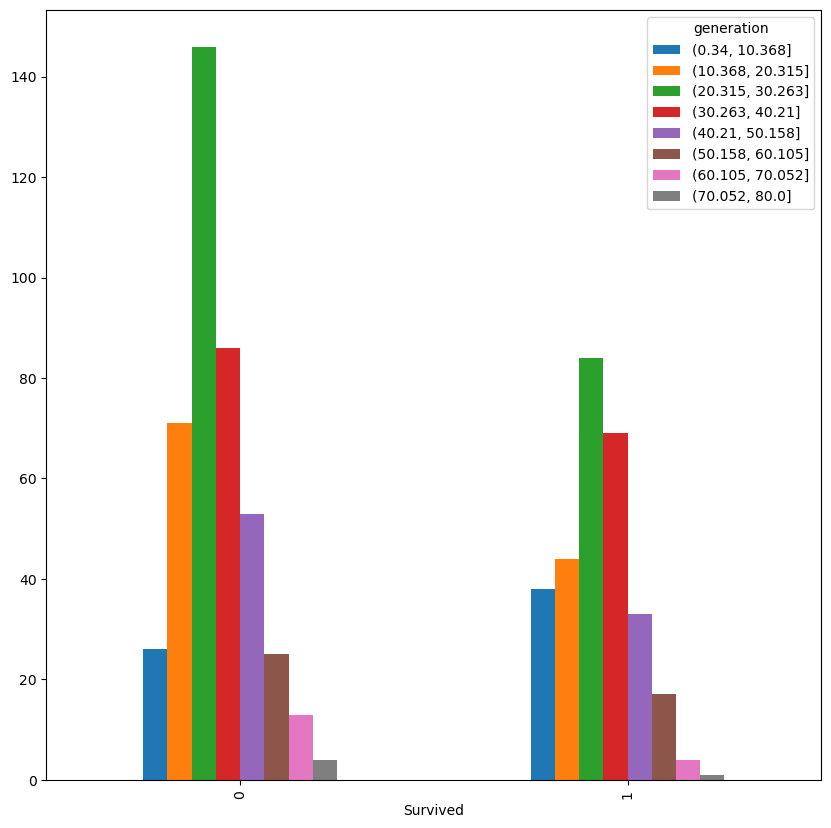

In [23]:
df.groupby(
    ['Survived', 'generation']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### Survival rate depending on Fare

In [24]:
df['fare_category'] = pd.cut(df['Fare'], 12)

In [25]:
pd.cut(df['Fare'], 10)

0       (-0.512, 51.233]
1      (51.233, 102.466]
2       (-0.512, 51.233]
3      (51.233, 102.466]
4       (-0.512, 51.233]
             ...        
886     (-0.512, 51.233]
887     (-0.512, 51.233]
888     (-0.512, 51.233]
889     (-0.512, 51.233]
890     (-0.512, 51.233]
Name: Fare, Length: 891, dtype: category
Categories (10, interval[float64, right]): [(-0.512, 51.233] < (51.233, 102.466] < (102.466, 153.699] < (153.699, 204.932] ... (307.398, 358.63] < (358.63, 409.863] < (409.863, 461.096] < (461.096, 512.329]]

<Axes: xlabel='Survived'>

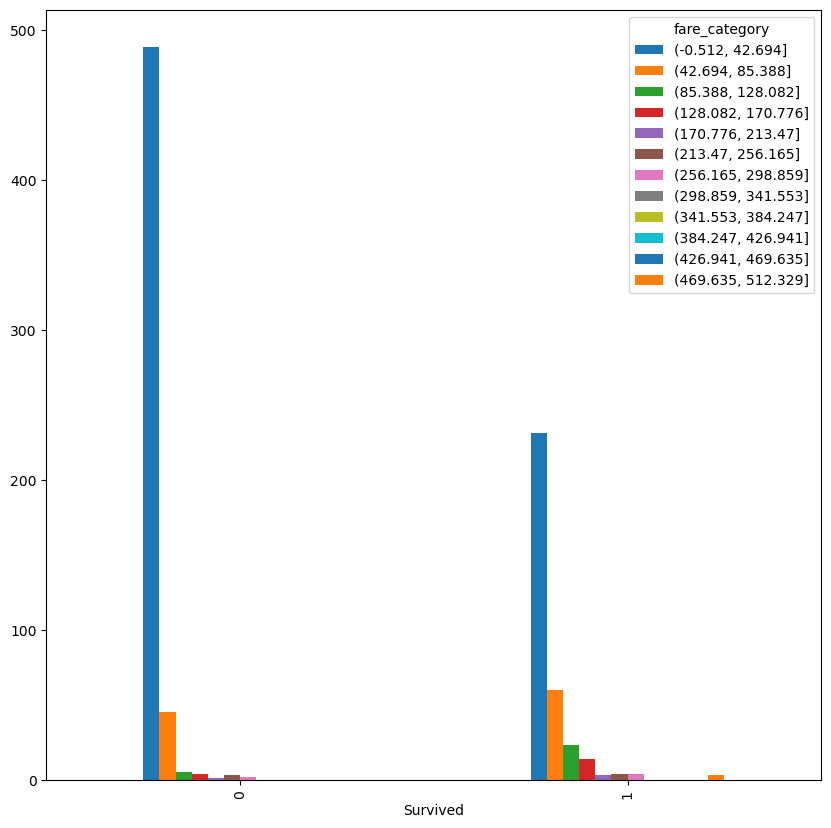

In [26]:
df.groupby(
    ['Survived', 'fare_category']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### What about correlations?

In [27]:
df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].corr()

,Survived,Pclass,Age,Fare,SibSp,Parch
Survived,1.000000,-0.338481,-0.077221,0.257307,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.369226,-0.549500,0.083081,0.018443
Age,-0.077221,-0.369226,1.000000,0.096067,-0.308247,-0.189119
Fare,0.257307,-0.549500,0.096067,1.000000,0.159651,0.216225
SibSp,-0.035322,0.083081,-0.308247,0.159651,1.000000,0.414838
Parch,0.081629,0.018443,-0.189119,0.216225,0.414838,1.000000


In [28]:
df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].corr().style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,Fare,SibSp,Parch
Survived,1.000000,-0.338481,-0.077221,0.257307,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.369226,-0.549500,0.083081,0.018443
Age,-0.077221,-0.369226,1.000000,0.096067,-0.308247,-0.189119
Fare,0.257307,-0.549500,0.096067,1.000000,0.159651,0.216225
SibSp,-0.035322,0.083081,-0.308247,0.159651,1.000000,0.414838
Parch,0.081629,0.018443,-0.189119,0.216225,0.414838,1.000000


.style.background_gradient(cmap='coolwarm') : Cette partie applique un style à la matrice de corrélation pour la rendre visuellement plus claire en utilisant un gradient de couleurs. Le cmap='coolwarm' applique une carte de couleurs où les valeurs de corrélation négatives apparaîtront dans des teintes plus froides (bleues) et les valeurs positives dans des teintes plus chaudes (rouges). Ce type de formatage aide à repérer rapidement les relations entre les variables.

## Questions:

##### Cabins on the port side have an even number and cabins on the starboard side have an odd number. 

#### For example, cabin B57 is located on the starboard side.

#### Which side of the boat is better to be on? 


#### The deck number of the boat is indicated on the ticket. Cabin B57 is located on deck B. Which deck is best to be on?

#### Where is the best place to be on the boat in general?

#### Is there a link between the number of parents/family on the boat and chances of survival?

In [56]:
df['NumberCabin'] = df['Cabin'].str.extract(r'(\d+)').astype(float)
df['NumberCabin']

0        NaN
1       85.0
2        NaN
3      123.0
4        NaN
       ...  
886      NaN
887     42.0
888      NaN
889    148.0
890      NaN
Name: NumberCabin, Length: 891, dtype: float64

In [69]:
df['CabinSide'] = df['NumberCabin'] % 2 == 0
df['CabinSide']

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: CabinSide, Length: 891, dtype: bool

In [70]:
df['CabinSide'] = df['CabinSide'].map({True: 'Port', False: 'Starboard'})
df['CabinSide']

0      Starboard
1      Starboard
2      Starboard
3      Starboard
4      Starboard
         ...    
886    Starboard
887         Port
888    Starboard
889         Port
890    Starboard
Name: CabinSide, Length: 891, dtype: object

<Axes: xlabel='CabinSide'>

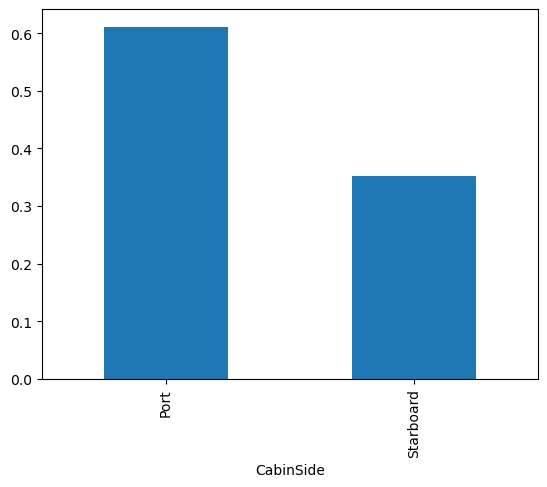

In [76]:
df.groupby('CabinSide')['Survived'].mean()
df.groupby('CabinSide')['Survived'].mean().plot(kind = "bar")

<Axes: xlabel='CabinSide'>

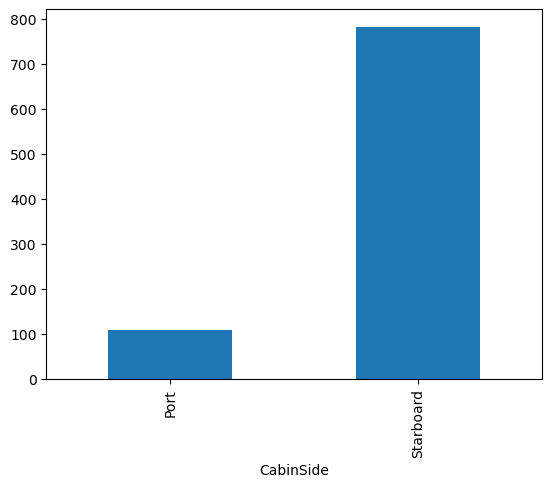

In [78]:
df.groupby('CabinSide')['Survived'].count()
df.groupby('CabinSide')['Survived'].count().plot(kind = "bar")

In [82]:
df['Deck'] = df['Cabin'].str[0]
df['Deck']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Deck, Length: 891, dtype: object

<Axes: xlabel='Deck'>

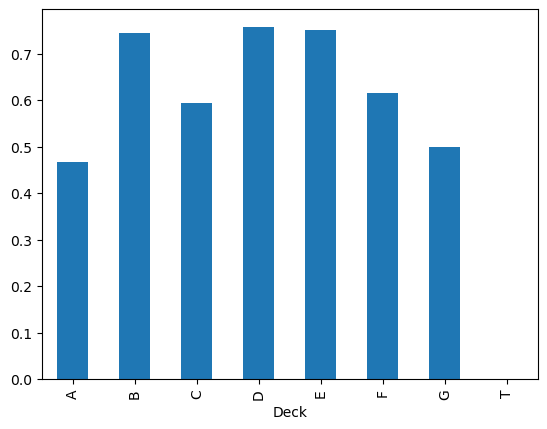

In [85]:
df.groupby('Deck')['Survived'].mean()
df.groupby('Deck')['Survived'].mean().plot(kind = 'bar')

<Axes: xlabel='Deck'>

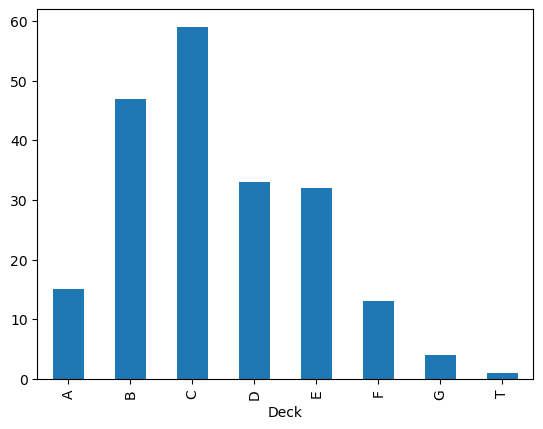

In [86]:
df.groupby('Deck')['Survived'].count()
df.groupby('Deck')['Survived'].count().plot(kind = 'bar')

<Axes: >

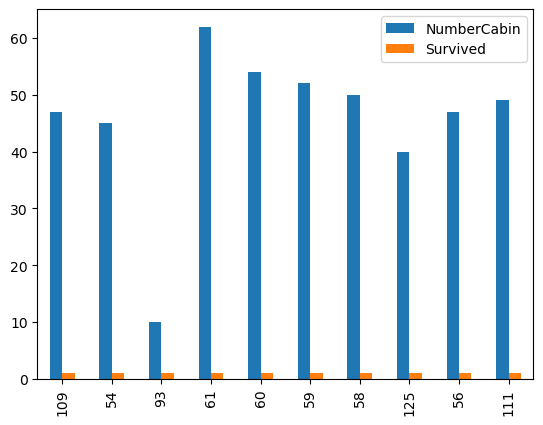

In [102]:
df.groupby(['Deck','NumberCabin'])['Survived'].mean().unstack()
df.groupby(['Deck','NumberCabin'])['Survived'].mean().reset_index().sort_values(by='Survived', ascending=False)
df.groupby(['Deck','NumberCabin'])['Survived'].mean().reset_index().sort_values(by='Survived', ascending=False).head(10)
df.groupby(['Deck','NumberCabin'])['Survived'].mean().reset_index().sort_values(by='Survived', ascending=False).head(10).plot(kind = 'bar')

<Axes: >

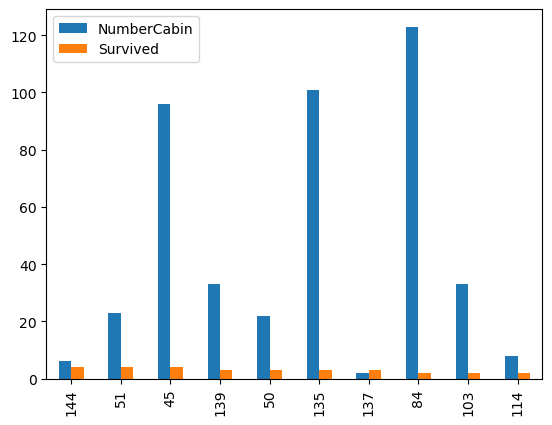

In [103]:
df.groupby(['Deck','NumberCabin'])['Survived'].count().unstack()
df.groupby(['Deck','NumberCabin'])['Survived'].count().reset_index().sort_values(by='Survived', ascending=False)
df.groupby(['Deck','NumberCabin'])['Survived'].count().reset_index().sort_values(by='Survived', ascending=False).head(10)
df.groupby(['Deck','NumberCabin'])['Survived'].count().reset_index().sort_values(by='Survived', ascending=False).head(10).plot(kind = 'bar')

#### What is the typical profile of the person who will survive the shipwreck?

#### What is the typical profile of the person who will not survive the shipwreck?